<a href="https://colab.research.google.com/github/aarda55/Stock-prediction-AI-29.01.2023/blob/main/stock_prediction-main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#reads dataset
import pandas as pd

data = pd.read_csv('TSLA.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3163,2023-01-23,135.869995,145.380005,134.270004,143.750000,143.750000,203119200
3164,2023-01-24,143.000000,146.500000,141.100006,143.889999,143.889999,158699100
3165,2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300
3166,2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100


In [2]:
#useless data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3163,2023-01-23,143.750000
3164,2023-01-24,143.889999
3165,2023-01-25,144.429993
3166,2023-01-26,160.270004


In [11]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [15]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3163   2023-01-23
3164   2023-01-24
3165   2023-01-25
3166   2023-01-26
3167   2023-01-27
Name: Date, Length: 3168, dtype: datetime64[ns]

In [18]:
data.index = data.pop('Date')
data

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-01-23,143.750000
2023-01-24,143.889999
2023-01-25,144.429993


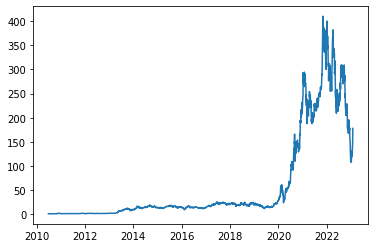

In [19]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [25]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2018-06-07', 
                                '2023-01-27', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-06-07,19.782667,19.408667,21.299999,21.072666
1,2018-06-08,19.408667,21.299999,21.072666,21.177334
2,2018-06-11,21.299999,21.072666,21.177334,22.139999
3,2018-06-12,21.072666,21.177334,22.139999,22.851334
4,2018-06-13,21.177334,22.139999,22.851334,22.985332
...,...,...,...,...,...
1164,2023-01-23,128.779999,127.169998,133.419998,143.750000
1165,2023-01-24,127.169998,133.419998,143.750000,143.889999
1166,2023-01-25,133.419998,143.750000,143.889999,144.429993
1167,2023-01-26,143.750000,143.889999,144.429993,160.270004


In [26]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((1169,), (1169, 3, 1), (1169,))

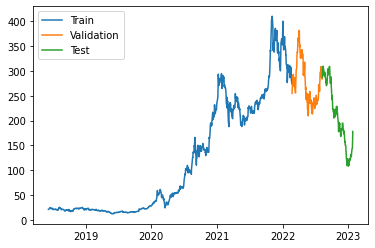

In [49]:
#partitions data to Train, Validation and Test parts
part_80 = int(len(dates) * .8)
part_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:part_80], X[:part_80], y[:part_80]

dates_val, X_val, y_val = dates[part_80:part_90], X[part_80:part_90], y[part_80:part_90]
dates_test, X_test, y_test = dates[part_90:], X[part_90:], y[part_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

#callback to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#fitting the model
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

#amount of epoches is insigificant because callback optimzes autonomosly
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=43, callbacks=[callback])

Epoch 1/43
30/30 [==============================] - 4s 23ms/step - loss: 26249.1875 - mean_absolute_error: 115.6874 - val_loss: 77295.2734 - val_mean_absolute_error: 274.7151
Epoch 2/43
30/30 [==============================] - 0s 6ms/step - loss: 25173.0977 - mean_absolute_error: 109.8984 - val_loss: 72421.6953 - val_mean_absolute_error: 265.6768
Epoch 3/43
30/30 [==============================] - 0s 5ms/step - loss: 21114.5195 - mean_absolute_error: 98.3640 - val_loss: 53271.1445 - val_mean_absolute_error: 226.7051
Epoch 4/43
30/30 [==============================] - 0s 6ms/step - loss: 12837.4336 - mean_absolute_error: 78.5804 - val_loss: 26190.5957 - val_mean_absolute_error: 156.1277
Epoch 5/43
30/30 [==============================] - 0s 5ms/step - loss: 4608.5513 - mean_absolute_error: 36.3744 - val_loss: 6696.5156 - val_mean_absolute_error: 70.3488
Epoch 6/43
30/30 [==============================] - 0s 6ms/step - loss: 1167.5304 - mean_absolute_error: 14.0676 - val_loss: 1361.3416 

30/30 [==============================] - 1s 2ms/step


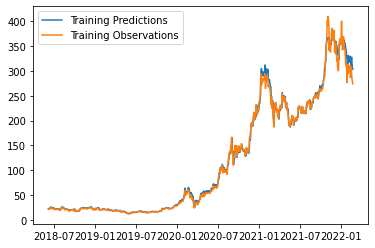

In [44]:
#check for Train prediction precision
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 4ms/step


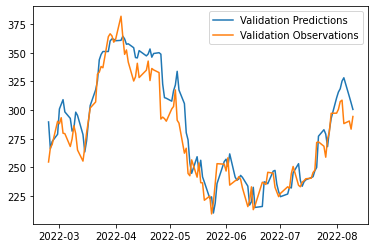

In [45]:
#check for Validation prediction precision
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


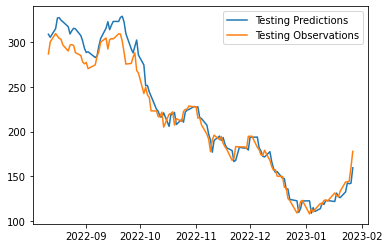

In [46]:
#check for Test prediction precision
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

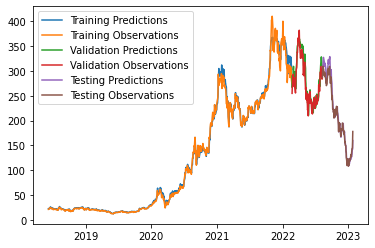

In [47]:
#all output data combined with all actual data
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])